Epoch [1/5], Step [100/782], Loss: 1.7984
Epoch [1/5], Step [200/782], Loss: 1.6761
Epoch [1/5], Step [300/782], Loss: 1.7746
Epoch [1/5], Step [400/782], Loss: 1.3749
Epoch [1/5], Step [500/782], Loss: 1.6245
Epoch [1/5], Step [600/782], Loss: 1.6205
Epoch [1/5], Step [700/782], Loss: 1.4343
Epoch [2/5], Step [100/782], Loss: 1.3871
Epoch [2/5], Step [200/782], Loss: 1.5033
Epoch [2/5], Step [300/782], Loss: 1.6319
Epoch [2/5], Step [400/782], Loss: 1.5221
Epoch [2/5], Step [500/782], Loss: 1.3811
Epoch [2/5], Step [600/782], Loss: 1.3733
Epoch [2/5], Step [700/782], Loss: 1.7211
Epoch [3/5], Step [100/782], Loss: 1.2798
Epoch [3/5], Step [200/782], Loss: 1.1809
Epoch [3/5], Step [300/782], Loss: 1.3369
Epoch [3/5], Step [400/782], Loss: 1.2388
Epoch [3/5], Step [500/782], Loss: 1.2506
Epoch [3/5], Step [600/782], Loss: 1.3693
Epoch [3/5], Step [700/782], Loss: 1.5361
Epoch [4/5], Step [100/782], Loss: 1.3833
Epoch [4/5], Step [200/782], Loss: 1.1563
Epoch [4/5], Step [300/782], Loss:

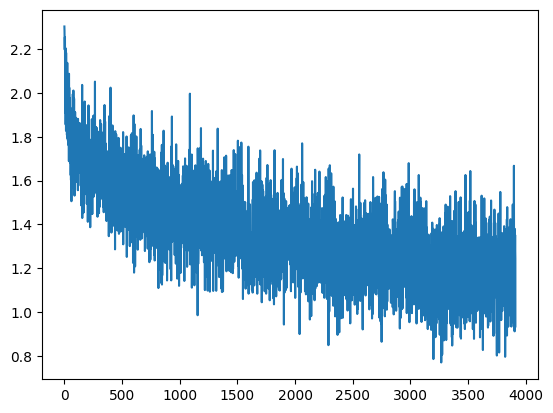

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set device (GPU if available, else CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the dataset
])

train_dataset = torchvision.datasets.CIFAR10(root='./data',download=True, transform=transform, train=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data',download=True, transform=transform, train=False)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

class ANN(nn.Module):
  def __init__(self):
    super(ANN, self).__init__()
    self.fc1 = nn.Linear(32*32*3, 256)
    self.fc2 = nn.Linear(256, 128)
    self.fc3 = nn.Linear(128, 10)

  def forward(self, x):
    x = x.view(-1, 32*32*3)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# Initialize the ANN model, loss function, and optimizer
model_ann = ANN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ann.parameters(), lr=0.001)

num_epochs = 5
ls_losses = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)
      outputs = model_ann(images)
      loss = criterion(outputs, labels)
      ls_losses.append(loss.detach().numpy())
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

# Plot Losses
x_axis = np.arange(0, len(ls_losses), 1)
plt.plot(x_axis, ls_losses)
plt.xlabel = "Sample"
plt.ylabel = "Loss"

model_ann.eval()
all_preds_ann = []
all_labels_ann = []
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_ann(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds_ann.extend(predicted.cpu().numpy())
        all_labels_ann.extend(labels.cpu().numpy())
accuracy_ann = accuracy_score(all_labels_ann, all_preds_ann)
precision_ann = precision_score(all_labels_ann, all_preds_ann, average='weighted')
recall_ann = recall_score(all_labels_ann, all_preds_ann, average='weighted')
f1_ann = f1_score(all_labels_ann, all_preds_ann, average='weighted')
print(f"ANN Accuracy: {accuracy_ann:.4f}")
print(f"ANN Precision: {precision_ann:.4f}")
print(f"ANN Recall: {recall_ann:.4f}")
print(f"ANN F1-Score: {f1_ann:.4f}")

class CNN(nn.Module):
  def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64*8*8, 512)
        self.fc2 = nn.Linear(512, 10)

  def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64*8*8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_cnn = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cnn.parameters(), lr=0.001)
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
      images = images.to(device)
      labels = labels.to(device)
      outputs = model_cnn(images)
      loss = criterion(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

model_cnn.eval()
all_preds_cnn = []
all_labels_cnn = []
with torch.no_grad():
    for images, labels in test_loader:
      images = images.to(device)
      lables = labels.to(device)
      outputs = model_cnn(images)
      _, predicted = torch.max(outputs.data, 1)
      all_preds_cnn.extend(predicted.cpu().numpy())
      all_labels_cnn.extend(labels.cpu().numpy())

accuracy_cnn = accuracy_score(all_labels_cnn, all_preds_cnn)
precision_cnn = precision_score(all_labels_cnn, all_preds_cnn, average='weighted')
recall_cnn = recall_score(all_labels_cnn, all_preds_cnn, average='weighted')
f1_cnn = f1_score(all_labels_cnn, all_preds_cnn, average='weighted')

print(f"CNN Accuracy: {accuracy_cnn:.4f}")
print(f"CNN Precision: {precision_cnn:.4f}")
print(f"CNN Recall: {recall_cnn:.4f}")
print(f"CNN F1-Score: {f1_cnn:.4f}")

import pandas as pd
data = {
    'Model':['ANN', 'CNN'],
    'Accuracy':[accuracy_ann, accuracy_cnn],
    'Precision':[precision_ann, precision_cnn],
    'Recall':[recall_ann, recall_cnn],
    'F1-Score':[f1_ann, f1_cnn]
}
df_comparison = pd.DataFrame(data)
print(df_comparison)
